<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab07_srs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: KNN
## Scott Spurlock
### 3/3/2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1jsazLeOrMKG4IJJ6-KpoGmxUdex6qPoJ")
df = df.dropna()
print(df.shape)
df.head(10)

(15, 8)


,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [3]:
print('P(Class = Mammal):', df[df['Class'] == 'mammals'].Class.count() )

P(Class = Mammal): 5


Let's figure out which way a flying squirrel would be classified. Assume that attribute values would be:

Warm-blooded: 1
Gives Birth: 1
Aquatic Creature: 0
Aerial Creature: 1
Has Legs: 1
Hibernates: 0
We want to find P(M | A) and P(N | A), and check which is larger.

P(M | 1,1,0,1,1,0) = P(M) P(WB=1 | M) P(GB=1 | M) P(AqC=0 | M) P(AeC=1 | M) P(HL=1 | M) P(H=0 | M) ... = 5/15 5/5 5/5 4/5 1/5 4/5 3/5 = 0.0256

P(N | 1,1,0,1,1,0) = P(N) P(WB=1 | N) P(GB=1 | N) P(AqC=0 | N) P(AeC=1 | M) P(HL=1 | N) P(H=0 | N) ... = 10/15 2/10 1/10 3/10 1/10 6/10 7/10 = 0.000168

Predict Mammal

In [4]:
# Mammal
5/15 * 5/5 * 5/5 * 4/5 * 1/5 * 4/5 * 3/5

0.0256

In [5]:
# Non-mammal
10/15 * 2/10 * 1/10 * 3/10 * 1/10 * 6/10 * 7/10


0.00016799999999999994

## Build a classifier

### Separate out class label (target variable) into y and data into X, make a Naive Bayes classifier, and fit (learn) a model.

In [6]:
ytrain = df['Class']
Xtrain = df.drop(['Name','Class'], axis=1)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
print('Class names:', clf.classes_)
print('Prior probabilities:', clf.class_prior_)
print('Class count:', clf.class_count_)


Class names: ['mammals' 'non-mammals']
Prior probabilities: [0.33333333 0.66666667]
Class count: [ 5. 10.]


In [8]:
testData = [
            ['gila monster',0,0,0,0,1,1,'non-mammals'],
            ['platypus',1,0,0,0,1,1,'mammals'],
            ['owl',1,0,0,1,1,0,'non-mammals'],
            ['dolphin',1,1,1,0,0,0,'mammals']
           ]
testData = pd.DataFrame(testData, columns=df.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


We first extract the predictor and target class attributes from the test data and then apply the classifier to predict their classes.

In [9]:
ytest = testData['Class']
Xtest = testData.drop(['Name','Class'], axis=1)

ypred = clf.predict(Xtest)
predictions = pd.concat([testData['Name'], pd.Series(ypred, name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples.

In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, ypred)
print('Accuracy on test data is {:.2f}'.format(acc))


Accuracy on test data is 0.75


In [11]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

     mammals       1.00      0.50      0.67         2
 non-mammals       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



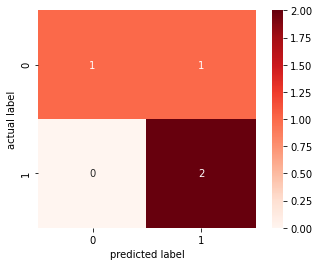

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='Reds')
plt.xlabel('predicted label')
plt.ylabel('actual label');

## Challenge

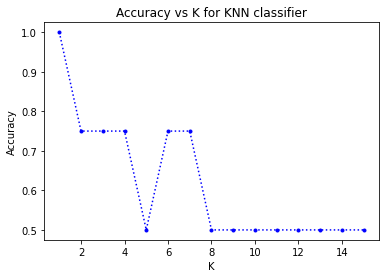

In [13]:
# Using KNN Classifier from the Scikit Learn library
from sklearn.neighbors import KNeighborsClassifier
acc = []
k_vals = np.arange(1, 16)

for k in k_vals:
    neighbor = KNeighborsClassifier(n_neighbors=k)
    neighbor.fit(Xtrain, ytrain)
    ypred = neighbor.predict(Xtest)
    acc.append(neighbor.score(Xtest, ytest))

plt.plot(k_vals, acc, ':b.')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K for KNN classifier')
plt.show()